In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df =pd.read_csv("../data/UN_data_exploration.csv")

In [3]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [4]:
gdp_df=gdp_df.drop('Value Footnotes', axis=1)

In [5]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [6]:
gdp_df = gdp_df.rename(columns={"Country or Area": "Country", "Value": "GDP_Per_Capita"})
gdp_df.columns

Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')

**6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.**

In [7]:
gdp_df.shape

(7176, 3)

In [8]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [9]:
gdp_df['Country'] = gdp_df['Country'].astype('string')

In [10]:
gdp_df.dtypes

Country            string
Year                int64
GDP_Per_Capita    float64
dtype: object

**7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?**

In [11]:
years = gdp_df['Year'].unique()

In [12]:
#Make a list of lists 
years_obs = []
for year in years:
    years_obs.append([year, len(gdp_df[gdp_df['Year']==year])])
#Convert this list of lists into a data frame
years_obs_df = pd.DataFrame(years_obs, columns =['Years','Observations'])

In [13]:
years_obs_df.head()

,Years,Observations
0,2020,240
1,2019,241
2,2018,242
3,2017,242
4,2016,242


In [14]:
years_obs_df["Observations"].describe()

count     31.000000
mean     231.483871
std       11.899218
min      206.000000
25%      226.000000
50%      236.000000
75%      240.000000
max      242.000000
Name: Observations, dtype: float64

**8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?**

In [15]:
number_of_countries = gdp_df["Country"].nunique()

In [16]:
number_of_countries

242

In [17]:
countries = gdp_df["Country"].unique()

In [18]:
countries_obs = []
for country in countries:
    countries_obs.append([country, len(gdp_df[gdp_df["Country"]== country])])
countries_obs
countries_obs_df = pd.DataFrame(countries_obs, columns =['Countries','Observations'])

In [19]:
countries_obs_df.sort_values(by=["Observations"])

,Countries,Observations
198,Somalia,8
53,Djibouti,8
226,Turks and Caicos Islands,10
193,Sint Maarten (Dutch part),10
112,Kosovo,13
...,...,...
107,Jordan,31
108,Kazakhstan,31
109,Kenya,31
137,Malta,31


**9. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.**

In [22]:
gdp_2014 = gdp_df[gdp_df["Year"]==2014]
gdp_2014

,Country,Year,GDP_Per_Capita
6,Afghanistan,2014,2102.384604
25,Africa Eastern and Southern,2014,3677.319414
56,Africa Western and Central,2014,4215.646000
87,Albania,2014,11586.833878
118,Algeria,2014,11512.690472
...,...,...,...
7031,Vietnam,2014,7601.858491
7062,West Bank and Gaza,2014,5967.073437
7089,World,2014,15224.439424
7120,Zambia,2014,3450.037600


**10. Use describe() to find the summary statistics for GDP per capita in 2014.**

In [23]:
gdp_2014["GDP_Per_Capita"].describe()

count       242.000000
mean      19612.875611
std       20961.714572
min         822.611195
25%        4702.212961
50%       12178.874687
75%       26461.384188
max      155201.740571
Name: GDP_Per_Capita, dtype: float64

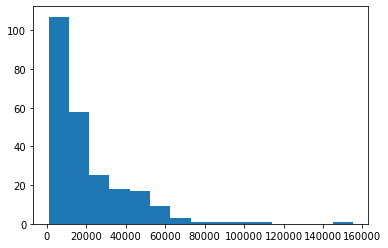

In [26]:
plt.hist(gdp_2014["GDP_Per_Capita"], bins=15)
plt.show()